In [ ]:
# conda install -c conda-forge tensorflow=1.15

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [28]:
data = read_csv('./data/price data.csv')
data

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
0,20100101,-4.9,-11.0,0.9,0.0,2123
1,20100102,-3.1,-5.5,5.5,0.8,2123
2,20100103,-2.9,-6.9,1.4,0.0,2123
3,20100104,-1.8,-5.1,2.2,5.9,2020
4,20100105,-5.2,-8.7,-1.8,0.7,2060
...,...,...,...,...,...,...
2917,20171227,-3.9,-8.0,0.7,0.0,2865
2918,20171228,-1.5,-6.9,3.7,0.0,2884
2919,20171229,2.9,-2.1,8.0,0.0,2901
2920,20171230,2.9,-1.6,7.1,0.6,2901


In [31]:
data.describe()

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
count,2.922000e+03,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,2.013567e+07,12.980527,8.288227,18.378645,3.445140,3276.506502
std,2.291784e+04,9.790108,10.232362,9.803192,8.563899,1369.364603
min,2.010010e+07,-10.800000,-14.800000,-7.400000,0.000000,1093.000000
25%,2.012010e+07,4.200000,-0.700000,9.700000,0.000000,2292.000000
50%,2.013567e+07,13.950000,8.700000,19.950000,0.100000,3026.000000
75%,2.015788e+07,21.700000,17.575000,27.100000,2.175000,3974.000000
max,2.017123e+07,29.900000,25.900000,35.600000,95.500000,12410.000000


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

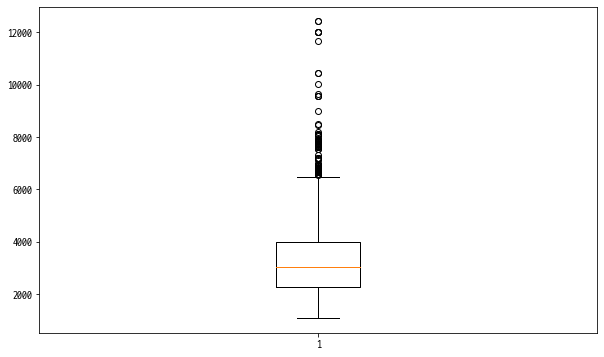

In [30]:
plt.boxplot(data['avgPrice'])
plt.show()

In [32]:
data = data[data.avgPrice < 6500]
data

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
0,20100101,-4.9,-11.0,0.9,0.0,2123
1,20100102,-3.1,-5.5,5.5,0.8,2123
2,20100103,-2.9,-6.9,1.4,0.0,2123
3,20100104,-1.8,-5.1,2.2,5.9,2020
4,20100105,-5.2,-8.7,-1.8,0.7,2060
...,...,...,...,...,...,...
2917,20171227,-3.9,-8.0,0.7,0.0,2865
2918,20171228,-1.5,-6.9,3.7,0.0,2884
2919,20171229,2.9,-2.1,8.0,0.0,2901
2920,20171230,2.9,-1.6,7.1,0.6,2901


In [33]:
data['year_1'] = data['year'].apply(lambda x: str(x)[:4])
data['month'] = data['year'].apply(lambda x: str(x)[4:6])
data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice,year_1,month
0,20100101,-4.9,-11.0,0.9,0.0,2123,2010,01
1,20100102,-3.1,-5.5,5.5,0.8,2123,2010,01
2,20100103,-2.9,-6.9,1.4,0.0,2123,2010,01
3,20100104,-1.8,-5.1,2.2,5.9,2020,2010,01
4,20100105,-5.2,-8.7,-1.8,0.7,2060,2010,01
...,...,...,...,...,...,...,...,...
2917,20171227,-3.9,-8.0,0.7,0.0,2865,2017,12
2918,20171228,-1.5,-6.9,3.7,0.0,2884,2017,12
2919,20171229,2.9,-2.1,8.0,0.0,2901,2017,12
2920,20171230,2.9,-1.6,7.1,0.6,2901,2017,12


In [34]:
means = data.groupby(['year_1', 'month'],as_index=False).mean()
means['avgPrice'] = means['avgPrice'].apply(lambda x: round(x))
means

,year_1,month,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
0,2010,01,20100116.0,-1.851613,-6.635484,3.577419,0.967742,2170
1,2010,02,20100214.5,2.353571,-1.985714,7.203571,2.932143,3083
2,2010,03,20100316.0,5.458065,1.125806,9.880645,2.874194,4414
3,2010,04,20100415.5,9.863333,4.493333,15.456667,2.970000,5850
4,2010,05,20100516.0,17.087097,11.538710,23.041935,4.003226,4329
...,...,...,...,...,...,...,...,...
90,2017,08,20170810.5,26.045000,22.845000,30.280000,8.465000,5549
91,2017,09,20170922.5,19.956250,14.893750,25.843750,1.687500,6241
92,2017,10,20171016.0,15.312903,10.803226,20.967742,2.170968,4388
93,2017,11,20171115.5,6.803333,1.260000,12.923333,0.413333,2581


In [35]:
month_price = means[['avgTemp','minTemp','maxTemp','rainFall','year','avgPrice']]
month_price = month_price[month_price.columns[4:6]]
month_price

,year,avgPrice
0,20100116.0,2170
1,20100214.5,3083
2,20100316.0,4414
3,20100415.5,5850
4,20100516.0,4329
...,...,...
90,20170810.5,5549
91,20170922.5,6241
92,20171016.0,4388
93,20171115.5,2581


In [36]:
month_price['year_2'] = month_price['year'].apply(lambda x: str(x)[0:6])
month_price['avgPrice_2'] = month_price['avgPrice']
month_price = month_price[month_price.columns[2:4]]
month_price

,year_2,avgPrice_2
0,201001,2170
1,201002,3083
2,201003,4414
3,201004,5850
4,201005,4329
...,...,...
90,201708,5549
91,201709,6241
92,201710,4388
93,201711,2581


In [37]:
data['year_2'] = data['year'].apply(lambda x: str(x)[0:6])
data.drop(['avgPrice','year_1','month'],axis=1, inplace=True)
data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,avgTemp,minTemp,maxTemp,rainFall,year_2
0,20100101,-4.9,-11.0,0.9,0.0,201001
1,20100102,-3.1,-5.5,5.5,0.8,201001
2,20100103,-2.9,-6.9,1.4,0.0,201001
3,20100104,-1.8,-5.1,2.2,5.9,201001
4,20100105,-5.2,-8.7,-1.8,0.7,201001
...,...,...,...,...,...,...
2917,20171227,-3.9,-8.0,0.7,0.0,201712
2918,20171228,-1.5,-6.9,3.7,0.0,201712
2919,20171229,2.9,-2.1,8.0,0.0,201712
2920,20171230,2.9,-1.6,7.1,0.6,201712


In [38]:
last = pd.merge(data,month_price,how='outer')
last

,year,avgTemp,minTemp,maxTemp,rainFall,year_2,avgPrice_2
0,20100101,-4.9,-11.0,0.9,0.0,201001,2170
1,20100102,-3.1,-5.5,5.5,0.8,201001,2170
2,20100103,-2.9,-6.9,1.4,0.0,201001,2170
3,20100104,-1.8,-5.1,2.2,5.9,201001,2170
4,20100105,-5.2,-8.7,-1.8,0.7,201001,2170
...,...,...,...,...,...,...,...
2820,20171227,-3.9,-8.0,0.7,0.0,201712,2739
2821,20171228,-1.5,-6.9,3.7,0.0,201712,2739
2822,20171229,2.9,-2.1,8.0,0.0,201712,2739
2823,20171230,2.9,-1.6,7.1,0.6,201712,2739


In [39]:
last.drop(['year_2'], axis=1, inplace=True)
last

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice_2
0,20100101,-4.9,-11.0,0.9,0.0,2170
1,20100102,-3.1,-5.5,5.5,0.8,2170
2,20100103,-2.9,-6.9,1.4,0.0,2170
3,20100104,-1.8,-5.1,2.2,5.9,2170
4,20100105,-5.2,-8.7,-1.8,0.7,2170
...,...,...,...,...,...,...
2820,20171227,-3.9,-8.0,0.7,0.0,2739
2821,20171228,-1.5,-6.9,3.7,0.0,2739
2822,20171229,2.9,-2.1,8.0,0.0,2739
2823,20171230,2.9,-1.6,7.1,0.6,2739


In [40]:
minmax = MinMaxScaler()

In [41]:
scaled_data = minmax.fit_transform(np.array(last, dtype=np.float32))

In [42]:
model = tf.global_variables_initializer()

In [43]:
# 4개의 변인을 입력을 받습니다.
x_data = scaled_data[:, 1:-1]

In [44]:
# 가격 값을 입력 받습니다.
y_data = np.array(last.iloc[:, [-1]], dtype=np.float32)

In [45]:
# 플레이스 홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

In [46]:
# y = wX+b
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

In [47]:
# 가설을 설정합니다. y = wX+b
# tensorflow 행렬곱 합수 matmul
hypothesis = tf.matmul(X, W) + b
# hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [50]:
# 비용 함수를 설정합니다. (예측값 - 실제값)제곱의 평균
# reduce_mean은 특정 차원을 제거하고 평균을 구한다.
loss = tf.reduce_mean(tf.abs(hypothesis - Y))
correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [51]:
# 최적화 함수를 설정합니다.
optimizer = tf.train.MomentumOptimizer(learning_rate=0.005, momentum=0.9, use_nesterov=True)
train = optimizer.minimize(loss)

In [52]:
# 세션을 생성합니다.
sess = tf.Session()

In [53]:
# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

In [55]:
# 학습을 수행합니다.
for step in range(2000001):
    loss_, hypo_, _ = sess.run([loss, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10000 == 0:
        print("#", step, " 손실 비용: ", loss_)
        print("- 배추 가격: ", hypo_[0])
        
print('# 정확도:', sess.run(accuracy, feed_dict={X: x_data, Y: y_data}))

# 0  손실 비용:  872.7484
- 배추 가격:  [1958.788]
# 10000  손실 비용:  869.7401
- 배추 가격:  [1982.6821]
# 20000  손실 비용:  866.97064
- 배추 가격:  [2004.5394]
# 30000  손실 비용:  864.3724
- 배추 가격:  [2025.877]
# 40000  손실 비용:  861.86566
- 배추 가격:  [2047.016]
# 50000  손실 비용:  859.5543
- 배추 가격:  [2065.705]
# 60000  손실 비용:  857.4267
- 배추 가격:  [2083.0127]
# 70000  손실 비용:  855.47205
- 배추 가격:  [2101.0369]
# 80000  손실 비용:  853.6561
- 배추 가격:  [2118.1436]
# 90000  손실 비용:  851.93884
- 배추 가격:  [2135.5054]
# 100000  손실 비용:  850.2954
- 배추 가격:  [2153.1199]
# 110000  손실 비용:  848.71594
- 배추 가격:  [2169.3972]
# 120000  손실 비용:  847.27814
- 배추 가격:  [2183.3962]
# 130000  손실 비용:  845.9852
- 배추 가격:  [2196.6157]
# 140000  손실 비용:  844.75476
- 배추 가격:  [2209.445]
# 150000  손실 비용:  843.5816
- 배추 가격:  [2221.6177]
# 160000  손실 비용:  842.487
- 배추 가격:  [2233.5344]
# 170000  손실 비용:  841.4562
- 배추 가격:  [2246.3127]
# 180000  손실 비용:  840.49884
- 배추 가격:  [2257.8098]
# 190000  손실 비용:  839.5873
- 배추 가격:  [2268.745]
# 200000  손실 비용:  838.7339
- 배추 가

KeyboardInterrupt: 

In [ ]:
# 학습된 모델을 저장합니다.
saver = tf.train.Saver()
save_path = saver.save(sess, "./saved.cpkt")
print('학습된 모델을 저장했습니다.')